In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
import matplotlib.pyplot as plt
from pandas_ml_utils import FeaturesAndLabels, Model
from pandas_ml_utils.ml.data.extraction import extract_with_post_processor
from pandas_ml_quant import pd, np, PostProcessedFeaturesAndLabels

# just in case of GPU issues
os.environ["CUDA_VISIBLE_DEVICES"] = ""

automatically imported pandas_ml_utils 0.1.4


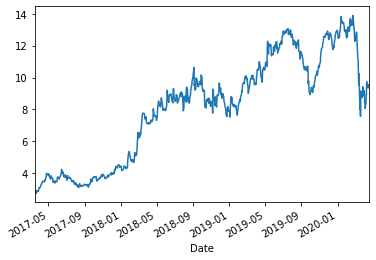

In [20]:
df = pd.read_pickle("data/RCM.pickle")
df["Close"].plot()

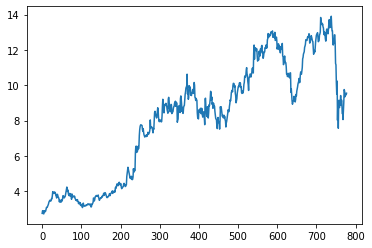

In [65]:
import pywt

cA, cD = pywt.dwt(df["Close"].values, 'haar')
plt.plot(pywt.idwt(cA, cD, 'haar'))

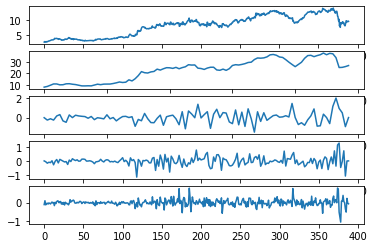

In [55]:
wavelet_ppg = df["Close"].values
wavelets = pywt.wavedec(df["Close"].values,'haar', level=3)
fig, ax = plt.subplots(len(wavelets)+1)
ax[0].plot(df["Close"].values)

for i, wavelet in enumerate(wavelets):
    ax[i+1].plot(wavelet)


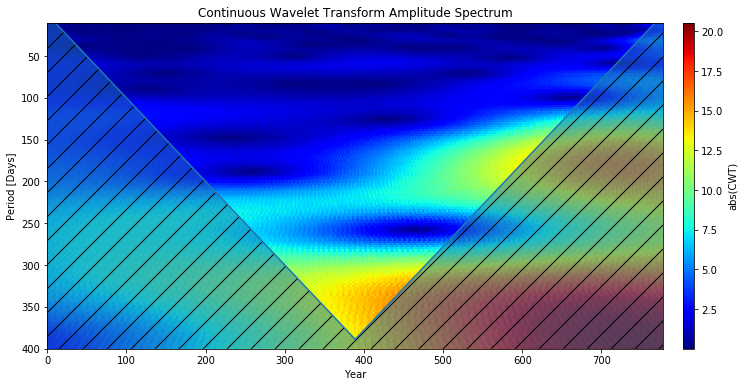

In [71]:
import scaleogram as scg
#scales = np.logspace(1.2, 3.1, num=200, dtype=np.int32)
scales = np.arange(15, 600, 4)
ax = scg.cws(np.arange(0, len(df)), df["Close"].values, scales, figsize=(12,6), ylabel="Period [Days]", xlabel='Year')


(7.288244968631074, -1)

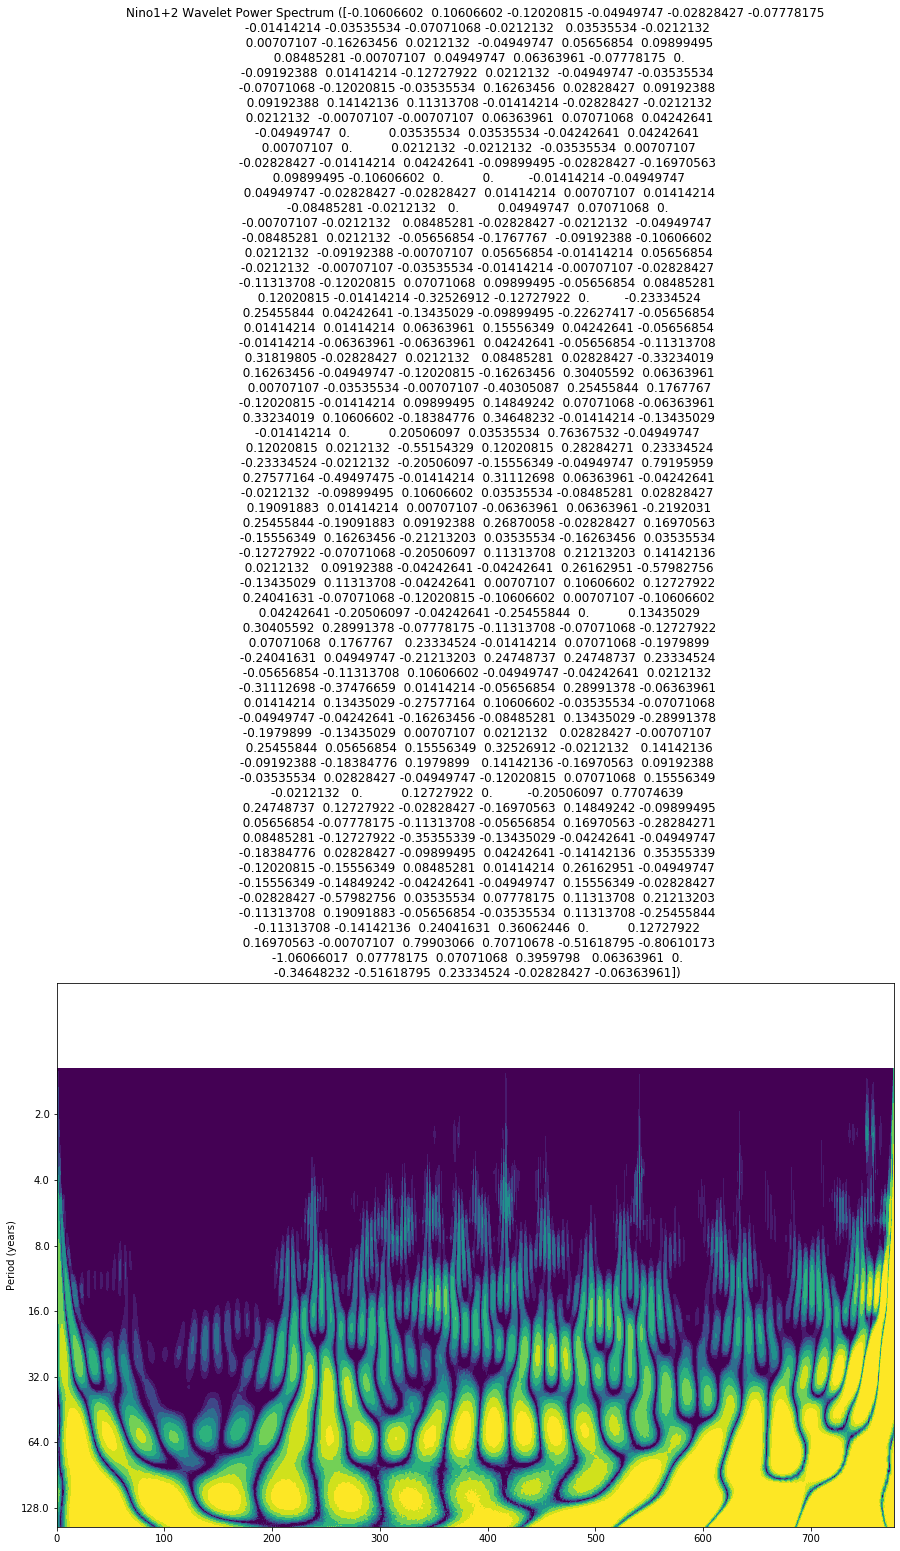

In [64]:
scales = np.arange(1, 128)
time = np.arange(0, len(df))

w = pywt.Wavelet('haar')
[cfs, frequencies] = pywt.cwt(df["Close"].values, scales, 'morl')
power = (abs(cfs)) ** 2

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), np.log2(levels),
            extend='both')

ax.set_title('%s Wavelet Power Spectrum (%s)' % ('Nino1+2', wavelet))
ax.set_ylabel('Period (years)')
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                        np.ceil(np.log2(period.max())))
ax.set_yticks(np.log2(Yticks))
ax.set_yticklabels(Yticks)
ax.invert_yaxis()
ylim = ax.get_ylim()
ax.set_ylim(ylim[0], -1)

In [13]:
def download(symbol):
    try:
        pd.fetch_yahoo(symbol).to_pickle(f"data/{symbol}.pickle")
        return True
    except:
        return False
        
    
success = pd.read_csv("data/russel2000.tickers")["Symbol"][10:].apply(download)
success.sum()

1623